MAIN SEARCH

In [30]:
import requests
from selenium import webdriver
from bs4 import BeautifulSoup
from serpapi import GoogleSearch

item_search = input("what item do you want to search for: ")
web_type = 'ebay'

#EBAY-----------------------------------------
def Search_ebay(x):
    global URL, list_of_items, photos, titles, price, links, ship_price
    params = {
    "engine": "google",
    "q": 'site:ebay.com ' + x,
    "api_key": "9465d440bd4b692b0e147d4f8684399f15a7afb9891f546f33c6867cd2a71983"
}

    search = GoogleSearch(params)

    results = search.get_dict()
    nresults = results['organic_results']

    headers = {"User-Agent": "Mozilla/5.0"}


    for i in range(len(nresults)):
        if 'https://www.ebay.com/b/' in nresults[i]['link']:
            print("link to all the items:" , nresults[i]['link'])
            URL = nresults[i]['link']
            break
            
    r = requests.get(URL, headers=headers)
    print(r)
    soup = BeautifulSoup(r.content, 'html.parser')
    titles = soup.find_all('span', class_="bsig__title")
    price = soup.find_all('span', class_="textual-display bsig__price bsig__price--displayprice")
    templinks = soup.find_all(class_='bsig__title') 
    links = []
    for title in templinks:
        link_tag = title.find("a")
        links.append(link_tag['href'])
    photos = soup.find_all('img', class_="brwrvr__item-card__image")
    ship_price = soup.find_all('span', class_="textual-display bsig__generic bsig__logisticsCost")
    #print(len(titles),len(price) ,len(links), len(photos), len(ship_price))        

    list_of_items = []
    for i in range(len(titles) if len(titles) < len(ship_price) else len(ship_price)):      #if faced with error here it can be due to the length of things found can be different, search for another item.
        item_stuff = [i, price[i].get_text(strip=True), titles[i].get_text(strip=True), links[i], photos[i]['data-originalsrc'], ship_price[i].get_text(strip=True).replace(' shipping', '')]
        list_of_items.append(item_stuff)
    
    for i in range(len(list_of_items)):
        print(list_of_items[i])

print(item_search)
Search_ebay(item_search)

glasses
link to all the items: https://www.ebay.com/b/Prescription-Glasses/179693/bn_2313852
<Response [200]>
[0, '$556.88', 'CARTIER SIGNATURE -C-DECOR LUNETTES EYEGLASSES FRAMES GOLD FINISH EYEGLASSES', 'https://www.ebay.com/itm/326329614814?hash=item4bfac2c1de:g:R4kAAOSwSGVnK9dS&itmprp=enc%3AAQAKAAAA4MHg7L1Zz0LA5DYYmRTS30k7IQyONFAv6WPygpcftVyyEV3YSNfWfDPDL%2FEe7In0BwsGjuKSzK7XBl0l3CIkYi3ZigjTeqV16x%2BUkBn8NVBySF9e2KjAXFPY1e0CXc2I0ve1T%2Bv4tMy4neVht3H0ecmWxN7V58d0NINKMgKnoaD%2FZbZX%2Fv4%2FqeYM0Wy609B1BFyc%2F4huNn5sxOpifWpTkaKYUwHMifvPqdMwneDVPwQo9UwzorEDHa2bcq5gqZeqztckAo1b2PqzB9WIJ7E9I9OuH2N1BHnjCJ08SiQlzQai%7Ctkp%3ABFBM7Myhh9hl', 'https://i.ebayimg.com/thumbs/images/g/R4kAAOSwSGVnK9dS/s-l400.jpg', '$55.13']
[1, '$145.13', '"SWAROVSKI" CRYSTAL EYEWEAR EYEGLASSES FRAMES GLASSES EYEGLASSES HALF FRAME', 'https://www.ebay.com/itm/396477498253?hash=item5c4fe6838d:g:UFkAAOSwnNBXbZLW&itmprp=enc%3AAQAKAAAA4MHg7L1Zz0LA5DYYmRTS30lxlXnaZjd7ReA2hG%2FQpaBnm7KE%2FyUrTA5TjPIECADVZnYTK0CtdKl4Lxo4HL

In [2]:
def get_condition():
    global condition
    condition = {}
    for i in range(len(list_of_items)):
        URL2 = list_of_items[i][3]
        headers = {"User-Agent": "Mozilla/5.0"}
        r2 = requests.get(URL2, headers=headers)
        soup2 = BeautifulSoup(r2.content, 'html.parser')
        text1 = soup2.find('span', class_="ux-icon-text__text")
        text = text1.get_text(strip=True)
        half = len(text) // 2
        if text[:half] == text[half:]:
            if text[:half] in condition:
                condition[text[:half]] += 1
            else:
                condition[text[:half]] = 1
        print(condition)

get_condition()

{'New without tags': 1}
{'New without tags': 1, 'New with tags': 1}
{'New without tags': 1, 'New with tags': 1, 'Pre-owned': 1}
{'New without tags': 1, 'New with tags': 1, 'Pre-owned': 1, 'New': 1}
{'New without tags': 1, 'New with tags': 1, 'Pre-owned': 1, 'New': 2}
{'New without tags': 1, 'New with tags': 1, 'Pre-owned': 1, 'New': 3}
{'New without tags': 2, 'New with tags': 1, 'Pre-owned': 1, 'New': 3}
{'New without tags': 2, 'New with tags': 1, 'Pre-owned': 1, 'New': 3, 'Used': 1}
{'New without tags': 2, 'New with tags': 2, 'Pre-owned': 1, 'New': 3, 'Used': 1}
{'New without tags': 2, 'New with tags': 3, 'Pre-owned': 1, 'New': 3, 'Used': 1}
{'New without tags': 2, 'New with tags': 3, 'Pre-owned': 1, 'New': 4, 'Used': 1}
{'New without tags': 2, 'New with tags': 3, 'Pre-owned': 2, 'New': 4, 'Used': 1}
{'New without tags': 2, 'New with tags': 3, 'Pre-owned': 2, 'New': 5, 'Used': 1}
{'New without tags': 3, 'New with tags': 3, 'Pre-owned': 2, 'New': 5, 'Used': 1}
{'New without tags': 3, '

In [3]:
def get_sellers():
    global Sellers
    old_Sellers = {}
    Sellers = {}
    for i in range(len(list_of_items)):
        URL2 = list_of_items[i][3]
        headers = {"User-Agent": "Mozilla/5.0"}
        r2 = requests.get(URL2, headers=headers)
        soup2 = BeautifulSoup(r2.content, 'html.parser')
        text1 = soup2.find('span', class_="ux-textspans ux-textspans--BOLD")
        if text1.get_text(strip=True) in old_Sellers:
            old_Sellers[text1.get_text(strip=True)] += 1
        else:
            old_Sellers[text1.get_text(strip=True)] = 1
    
    for i in range(len(old_Sellers)):
        if old_Sellers[list(old_Sellers.keys())[i]] != 1:
            Sellers[list(old_Sellers.keys())[i]] = old_Sellers[list(old_Sellers.keys())[i]]
        else:
            if 'Others' in Sellers:
                Sellers['Others'] += 1
            else:
                Sellers['Others'] = 1
        print(Sellers)


get_sellers()

{'VIP-AUKTIONEN': 25}
{'VIP-AUKTIONEN': 25, 'Others': 1}
{'VIP-AUKTIONEN': 25, 'Others': 2}
{'VIP-AUKTIONEN': 25, 'Others': 3}
{'VIP-AUKTIONEN': 25, 'Others': 3, 'VintageWelten / BRILLENshop': 6}
{'VIP-AUKTIONEN': 25, 'Others': 3, 'VintageWelten / BRILLENshop': 6, 'enzo._1': 2}
{'VIP-AUKTIONEN': 25, 'Others': 3, 'VintageWelten / BRILLENshop': 6, 'enzo._1': 2, 'alexbeck_antik_uhren_schmuck': 2}
{'VIP-AUKTIONEN': 25, 'Others': 3, 'VintageWelten / BRILLENshop': 6, 'enzo._1': 2, 'alexbeck_antik_uhren_schmuck': 2, 'miramarlan': 6}
{'VIP-AUKTIONEN': 25, 'Others': 4, 'VintageWelten / BRILLENshop': 6, 'enzo._1': 2, 'alexbeck_antik_uhren_schmuck': 2, 'miramarlan': 6}
{'VIP-AUKTIONEN': 25, 'Others': 4, 'VintageWelten / BRILLENshop': 6, 'enzo._1': 2, 'alexbeck_antik_uhren_schmuck': 2, 'miramarlan': 6, 'rruussi_43': 2}
{'VIP-AUKTIONEN': 25, 'Others': 4, 'VintageWelten / BRILLENshop': 6, 'enzo._1': 2, 'alexbeck_antik_uhren_schmuck': 2, 'miramarlan': 6, 'rruussi_43': 2, 'St.dupont Titanium Lunette B

In [31]:
def get_Country():
    global Hcountries
    Hcountries = []
    for i in range(len(list_of_items)):
        URL2 = list_of_items[i][3]
        headers = {"User-Agent": "Mozilla/5.0"}
        r2 = requests.get(URL2, headers=headers)
        soup2 = BeautifulSoup(r2.content, 'html.parser')
        text1 = soup2.find_all('span', class_="ux-textspans ux-textspans--SECONDARY")    
        for j in range(len(text1)):
            if 'Located in:' in text1[j].get_text(strip=True):
                text2 = text1[j].get_text(strip=True).replace('Located in:', '').replace(' ', '').split(",")
                Hcountries.append(text2[-1])
                print(text2[-1])

    print(Hcountries)
    dict1 = {}
    for i in range(len(Hcountries)):
        if Hcountries[i] in dict1:
            dict1[Hcountries[i]] += 1
        else:
            dict1[Hcountries[i]] = 1
    print(dict1)
    
get_Country()

Germany
Germany
Germany
Germany
Poland
Germany
Germany
Poland
Germany
Germany
Germany
Germany
Germany
Germany
Hungary
Germany
Germany
Austria
Poland
Poland
Germany
Poland
Germany
Germany
Poland
Germany
Poland
Germany
Germany
Germany
Germany
Germany
Germany
Hungary
Hungary
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Hungary
Hungary
Hungary
Germany
Serbia
Germany
Germany
Germany
Germany
Germany
Germany
Germany
['Germany', 'Germany', 'Germany', 'Germany', 'Poland', 'Germany', 'Germany', 'Poland', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Hungary', 'Germany', 'Germany', 'Austria', 'Poland', 'Poland', 'Germany', 'Poland', 'Germany', 'Germany', 'Poland', 'Germany', 'Poland', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Hungary', 'Hungary', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Hungary', 'Hungary', 'Hungary', 'Germany', 'Serbia', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 

PandaCV

In [8]:
import pandas as pd

if web_type == 'ebay':
    product_data = []
    
    for i in range(len(price)):
        product_info = {
            'Index': i,
            'Price': price[i].get_text(strip=True),
            'Title': titles[i].get_text(strip=True),
            'Link': links[i]
        }
        product_data.append(product_info)
    df = pd.DataFrame(product_data)
    display(df)

,Index,Price,Title,Link
0,0,$29.99,Pokémon Card Team Rocket's Glory sv10 Booster ...,https://www.ebay.com/p/21076843292?iid=3166729...
1,1,$67.65,USA Authentic popmart Monsters Labubu exciting...,https://www.ebay.com/p/28067418437?iid=3567185...
2,2,$60.11,X UX-00 Aero Pegasus 3-70A Double Metal Coat T...,https://www.ebay.com/p/28070315344?iid=3357852...
3,3,$62.94,Endless Spells Hedonites of Slaanesh Chaos War...,https://www.ebay.com/p/16031646113?iid=1768856...
4,4,$62.94,Action Racing William Byron 2023 #24 RAPTOR 1:...,https://www.ebay.com/p/28060940810?iid=2052299...
...,...,...,...,...
70,70,$24.98,Energizer Ultimate Lithium AA 18-Pack,https://www.ebay.com/itm/156835134534?hash=ite...
71,71,$53.95,Pokemon TCG: Gemstone Gem Pack “Horizons” Boos...,https://www.ebay.com/itm/187183472978?hash=ite...
72,72,$2.99to$199.99,2025 McDONALD'S Minecraft Adult Happy Meal TOY...,https://www.ebay.com/itm/116542704733?hash=ite...
73,73,$60.48to$476.33,Team Rocket’s Glory Attache Case Pokemon Card ...,https://www.ebay.com/itm/226707122474?hash=ite...


Selenium (Rate Search)

In [5]:
item_choice = int(input("choose the item you want to get it's rating: "))
rating_option = int(input("choose which rating you want (1.item rating, 2. seller rating): "))
from selenium import webdriver
from selenium.webdriver.common.by import By
import time


options = webdriver.ChromeOptions()
options.add_argument("--headless")

def item_rating(x):
      global five_rate_count, four_rate_count, three_rate_count, two_rate_count, one_rate_count
      options = webdriver.ChromeOptions()
      options.add_argument("--headless")

      driver = webdriver.Chrome(options=options)  #Remove 'options=options' to see the selenium open up the window to scrap it
      driver.get(list_of_items[x][3])
      time.sleep(6)
      rating_element = driver.find_element(By.XPATH, '//*[@id="UserReviews"]/div[1]/div[2]/span[1]').text
      count = driver.find_element(By.XPATH, '//*[@id="UserReviews"]/div[1]/div[2]/span[2]').text
      allrate_count = ''.join(i for i in count if i.isdigit())
      five_rate_count = driver.find_element(By.XPATH, '//*[@id="s0-0-21-5-60-9"]/ul/li[1]/div/div[2]/span').text
      four_rate_count = driver.find_element(By.XPATH, '//*[@id="s0-0-21-5-60-9"]/ul/li[2]/div/div[2]/span').text 
      three_rate_count = driver.find_element(By.XPATH, '//*[@id="s0-0-21-5-60-9"]/ul/li[3]/div/div[2]/span').text 
      two_rate_count = driver.find_element(By.XPATH, '//*[@id="s0-0-21-5-60-9"]/ul/li[3]/div/div[2]/span').text
      one_rate_count = driver.find_element(By.XPATH, '//*[@id="s0-0-21-5-60-9"]/ul/li[5]/div/div[2]/span').text

      print('over all rating:', rating_element , '\n', 
                  'all rating count:' , allrate_count, '\n', 
                  'five star rating:' , five_rate_count, '\n', 
                  'four star rating:' , four_rate_count, '\n' , 
                  'three star rating:' , three_rate_count, '\n' , 
                  'two star rating: ' , two_rate_count, '\n' , 
                  'one star rating:' , one_rate_count)
      
      driver.quit()
      
def seller_rating(x):
      global acc_rate, ship_cost, ship_speed, comm
      options = webdriver.ChromeOptions()
      options.add_argument("--headless")
      driver = webdriver.Chrome(options=options)
      driver.get(links[x]) 
      time.sleep(6)
      acc_rate = driver.find_element(By.XPATH, '//*[@id="STORE_INFORMATION"]/div/div/div[1]/div[2]/div/div/div[2]/div[1]/span').text
      ship_cost = driver.find_element(By.XPATH, '//*[@id="STORE_INFORMATION"]/div/div/div[1]/div[2]/div/div/div[2]/div[2]/span').text
      ship_speed = driver.find_element(By.XPATH, '//*[@id="STORE_INFORMATION"]/div/div/div[1]/div[2]/div/div/div[2]/div[3]/span').text
      comm = driver.find_element(By.XPATH, '//*[@id="STORE_INFORMATION"]/div/div/div[1]/div[2]/div/div/div[2]/div[4]/span').text
            
      print('Accurate description rating: ', acc_rate , '\n',
                  'Shipping cost rating:' , ship_cost, '\n', 
                  'Shipping speed rating:' , ship_speed, '\n', 
                  'Customer service rating:' , comm)
      
      driver.quit()
      
if rating_option == 1:
      try:
            item_rating(item_choice)
            review = True            
      except:
            print('this item has no review written, you can check the link: ' , links[item_choice])
            review = False
elif rating_option == 2:
      try:
            seller_rating(item_choice)
            review = True 
      except:
            print('this item has no seller rating written, you can check the link: ' , links[item_choice])
            review = False



Accurate description rating:  4.9 
 Shipping cost rating: 4.8 
 Shipping speed rating: 5.0 
 Customer service rating: 5.0


In [6]:
import matplotlib.pyplot as plt
import os
def show_Item_graph():
    labels = ['5-Star Rate', '4-Star Rate', '3-Star Rate', '2-Star Rate', '1-Star Rate']
    sizes = [five_rate_count, four_rate_count, three_rate_count, two_rate_count, one_rate_count]

    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title('Item Rating')
    if os.path.exists('item_Graph.jpg'):
        os.remove('item_Graph.jpg')
    plt.savefig('item_Graph.jpg')
    plt.show()

def Show_seller_graph():
    labels = ['Accurate description rating', 'Shipping cost rating', 'Shipping speed rating', 'Customer service rating']
    sizes = [acc_rate, ship_cost, ship_speed, comm]

    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title('Item Rating')
    if os.path.exists('Seller_Graph.jpg'):
        os.remove('Seller_Graph.jpg')
    plt.savefig('Seller_Graph.jpg')
    plt.show()

NetworkX

Skipped item 5 due to pricing issue
Degree = {146.24: 4, 56.14: 4, 212.63: 4, 41.63: 4, 201.38: 4}
Betweenness centrality = {146.24: 0.0, 56.14: 0.0, 212.63: 0.0, 41.63: 0.0, 201.38: 0.0}


c:\Users\omara\anaconda3\Lib\site-packages\networkx\drawing\nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


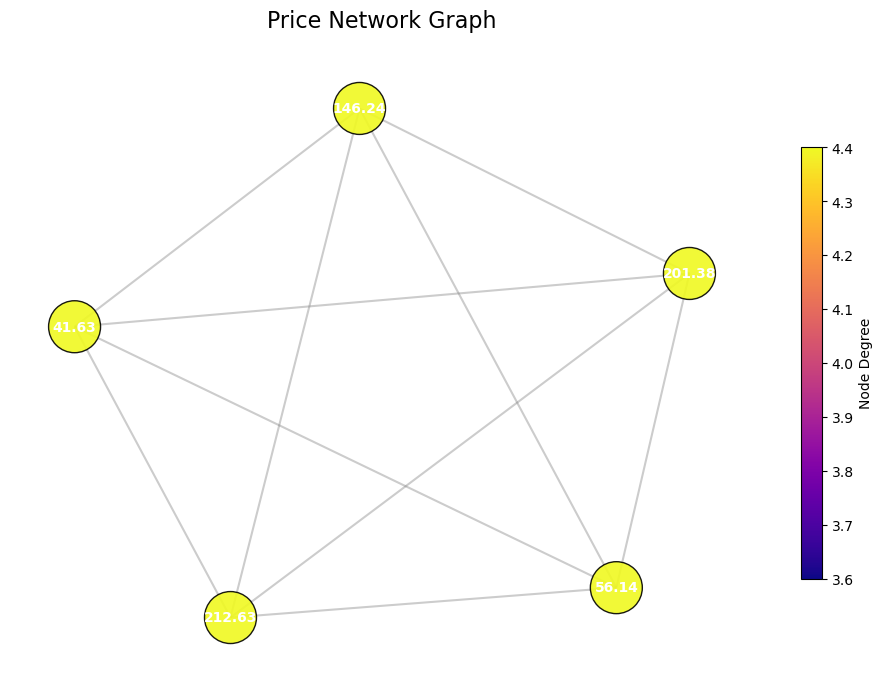

In [7]:
# Networkx
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os

def is_number(x):
    try:
        float(x)
        return True
    except:
        return False

low_num = int(input('Enter the starting number: '))
high_num = int(input('Enter the ending number: '))
diff_limit = int(input('Enter difference limit number: '))

def networkx_graph(low_num, high_num, diff_limit):
    all_prices = []
    for item in list_of_items:
        try:
            price_str = item[1].replace('$', '').replace(',', '')
            if is_number(price_str):
                price = float(price_str)
                all_prices.append(price)
            else:
                print('Skipped item', item[0], 'due to pricing issue')
        except Exception as e:
            print(f'Skipped item due to error: {e}')

    G = nx.Graph()
    sub_prices = all_prices[low_num:high_num]
    G.add_nodes_from(sub_prices)

    for i in range(len(sub_prices)):
        for j in range(i + 1, len(sub_prices)):
            diff = abs(sub_prices[i] - sub_prices[j])
            if diff <= diff_limit:
                G.add_edge(sub_prices[i], sub_prices[j])

    degree = dict(G.degree)
    print('Degree =', degree)
    centrality = nx.betweenness_centrality(G, normalized=False)
    print("Betweenness centrality =", centrality)

    fig, ax = plt.subplots(figsize=(12, 8))
    pos = nx.spring_layout(G, k=0.5, seed=42)

    degrees = list(degree.values())
    node_colors = [cm.plasma(deg / max(degrees) if max(degrees) > 0 else 0) for deg in degrees]
    node_sizes = [200 + deg * 300 for deg in degrees]

    nodes = nx.draw_networkx_nodes(G, pos,
                                   node_size=node_sizes,
                                   node_color=node_colors,
                                   cmap=cm.plasma,
                                   alpha=0.9,
                                   edgecolors='black',
                                   linewidths=1,
                                   ax=ax)

    nx.draw_networkx_edges(G, pos, width=1.5, alpha=0.4, edge_color='gray', ax=ax)

    nx.draw_networkx_labels(G, pos,
                            font_size=10,
                            font_color='white',
                            font_weight='bold',
                            ax=ax)

    sm = plt.cm.ScalarMappable(cmap=cm.plasma, 
                               norm=plt.Normalize(vmin=min(degrees), vmax=max(degrees)))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, shrink=0.7)
    cbar.set_label('Node Degree')

    ax.set_title('Price Network Graph', fontsize=16, pad=20)
    ax.axis('off')

    if os.path.exists('NetX_Graph.jpg'):
        os.remove('NetX_Graph.jpg')
    plt.savefig('NetX_Graph.jpg', bbox_inches='tight', dpi=300)
    plt.show()

networkx_graph(low_num, high_num, diff_limit)


Country Finder | Heatmap

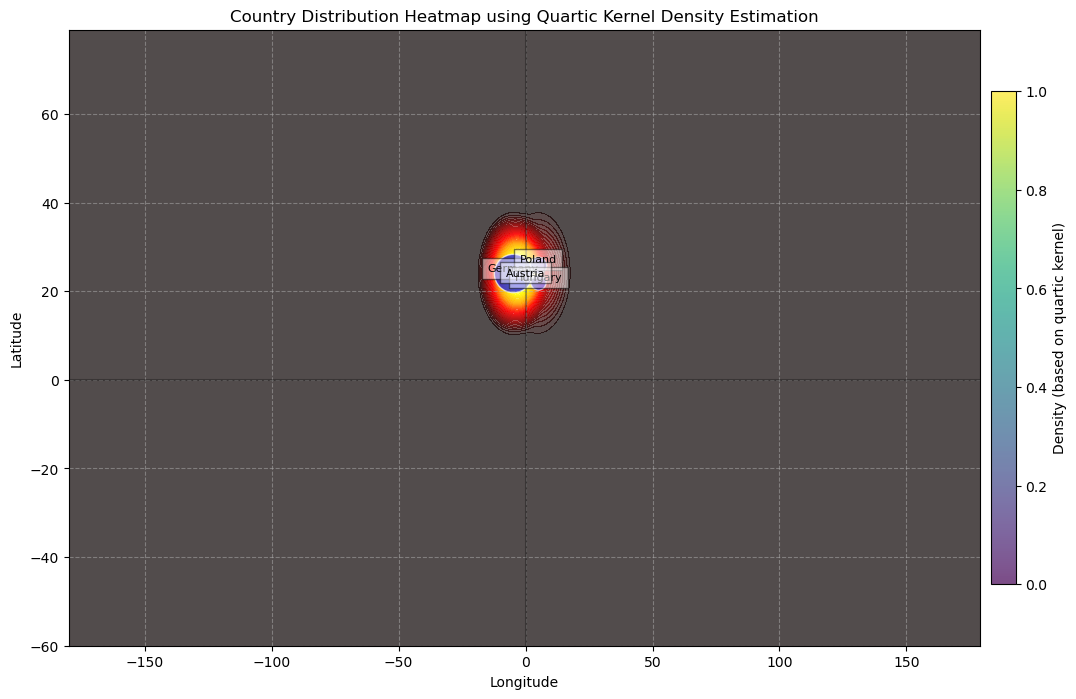

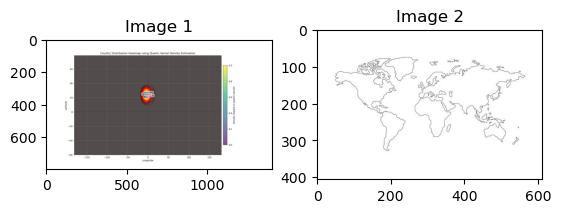

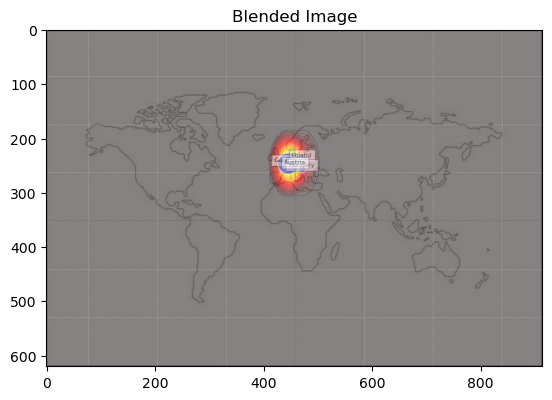

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import os
import cv2

def kde_quartic(d, h):
    """
    Quartic kernel function for KDE as described in the lecture
    d: distance
    h: bandwidth (radius)
    """
    if d <= h:
        dn = d/h
        return (15/16) * (1 - dn**2)**2
    else:
        return 0

def HeatOnMap():
    counties2 = Hcountries

    country_counts = pd.Series(counties2).value_counts().reset_index()
    country_counts.columns = ['country', 'count']

    country_coords = {
        'UnitedStates': (20, -90), # 37.0902, -95.7129
        'China': (15, 75), # 35.8617, 104.1954
        'UnitedKingdom': (27, -15), #- 55.3781, -3.4360
        'Japan': (16, 108), # 36.2048, 138.2529
        'Germany': (24, -5), #- 51.1657, 10.4515
        'France': (22, -10), #- 46.2276, 2.2137
        'Italy': (19, 0), #- 41.8719, 12.5674
        'Canada': (30, -110), # 56.1304, -106.3468
        'Australia': (-17, 105), # -25.2744, 133.7751
        'Spain': (19, -14), #- 40.4637, -3.7492
        'Brazil': (-10, -55), # -14.2350, -51.9253
        'India': (5, 55), # 20.5937, 78.9629
        'Mexico': (10, -98), # 23.6345, -102.5528
        'Poland': (26, 5), #-
        'Hungary': (22, 5), #-
        'Austria': (23, 0),
        'HongKong': (8,87),
        'SouthKorea': (17,97),
        'SriLanka': (0,58),
        'Malaysia': (0,75)
    }

    lats = []
    lons = []
    weights = []

    for index, row in country_counts.iterrows():
        country = row['country']
        count = row['count']
    
        if country in country_coords:
            lat, lon = country_coords[country]
            lats.append(lat)
            lons.append(lon)
            weights.append(count)

    resolution = 1.0
    lat_grid = np.arange(-60, 80, resolution)
    lon_grid = np.arange(-180, 180, resolution)
    density_grid = np.zeros((len(lat_grid), len(lon_grid)))

    bandwidth = 15.0

    for i, lat in enumerate(lat_grid):
        for j, lon in enumerate(lon_grid):
            total_density = 0
            for k in range(len(lats)):
                d = np.sqrt((lat - lats[k])**2 + (lon - lons[k])**2)
            
                density = kde_quartic(d, bandwidth) * weights[k]
                total_density += density
        
            density_grid[i, j] = total_density

    hot_colors = ['black', 'darkred', 'red', 'orange', 'yellow', 'white']
    hot_cmap = LinearSegmentedColormap.from_list('hot_custom', hot_colors)

    plt.figure(figsize=(14, 8))

    lon_mesh, lat_mesh = np.meshgrid(lon_grid, lat_grid)

    plt.contourf(lon_mesh, lat_mesh, density_grid, levels=50, 
                 cmap=hot_cmap, alpha=0.7)

    for i in range(len(lats)):
        plt.scatter(lons[i], lats[i], s=weights[i]*20, 
                    color='blue', alpha=0.7, edgecolors='white')
        plt.text(lons[i], lats[i], country_counts.iloc[i, 0], 
                 fontsize=8, ha='center', va='bottom', 
                 bbox=dict(facecolor='white', alpha=0.5))

    cbar = plt.colorbar(orientation='vertical', pad=0.01, shrink=0.8)
    cbar.set_label('Density (based on quartic kernel)')

    plt.grid(True, linestyle='--', alpha=0.5)
    plt.title('Country Distribution Heatmap using Quartic Kernel Density Estimation')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    if os.path.exists('heatmap_graph.jpg'):
        os.remove('heatmap_graph.jpg')
    plt.savefig('heatmap_graph.jpg')
    plt.show()

    Image1 = cv2.imread('heatmap_graph.jpg')
    Image1 = cv2.cvtColor(Image1, cv2.COLOR_BGR2RGB)
    Image2 = cv2.imread('world.jpg')
    Image2 = cv2.cvtColor(Image2, cv2.COLOR_BGR2RGB)

    plt.subplot(1, 2, 1)
    plt.imshow(Image1)
    plt.title("Image 1")
    plt.subplot(1, 2, 2)
    plt.imshow(Image2)
    plt.title("Image 2")
    plt.show()

    Image1 = Image1[93:713, 173:1087]

    Image2_resized = cv2.resize(Image2, (Image1.shape[1], Image1.shape[0]))

    alpha = 0.7
    dst = cv2.addWeighted(Image1, alpha, Image2_resized, 1-alpha, 0)
    plt.imshow(dst)
    plt.title("Blended Image")
    if os.path.exists('HeatOnMap.jpg'):
        os.remove('HeatOnMap.jpg')
    plt.savefig('HeatOnMap.jpg')
    plt.show()

HeatOnMap()

3D Graph

In [10]:
def find_title_length():
    global title_length
    title_length = []
    for i in range(len(list_of_items)):
        length = len(list_of_items[i][2])
        title_length.append(length)

In [11]:
def find_ThrD_prices():
    global ThrD_Price, ThrD_ShipPrice
    ThrD_Price = []
    ThrD_ShipPrice = []
    for i in range(len(list_of_items)):
        tempPrice = list_of_items[i][1].replace('$','').replace(',','')
        if 'to' not in tempPrice:
            tempPrice2 = float(list_of_items[i][1].replace('$','').replace(',',''))
        ThrD_Price.append(tempPrice2)
        tempPrice3 = list_of_items[i][5].replace('$','').replace(',','')
        if 'to' not in tempPrice3:
            tempPrice4 = float(list_of_items[i][5].replace('$','').replace(',',''))
        ThrD_ShipPrice.append(tempPrice4)

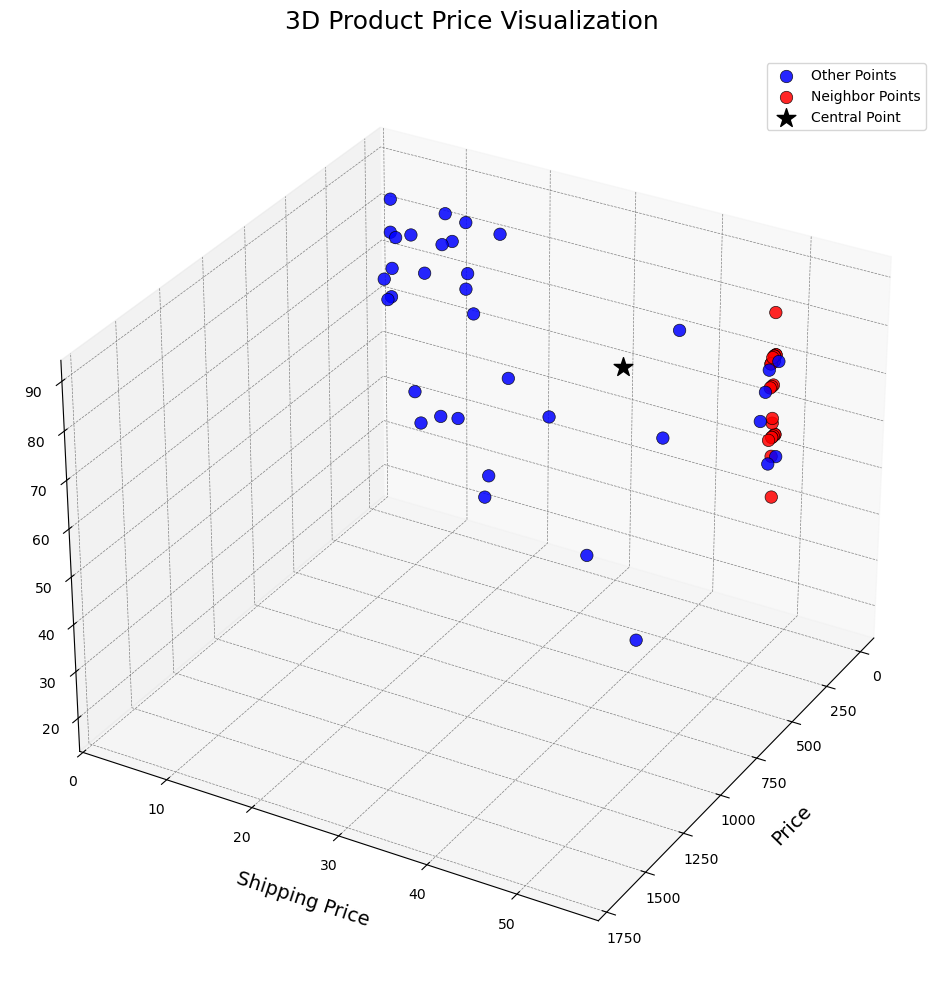

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import os

def Show_3d_Graph(x, y, z, dist):
    find_ThrD_prices()
    find_title_length()
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(projection='3d')

    prices = np.array(ThrD_Price)
    ship_prices = np.array(ThrD_ShipPrice)
    title_lengths = np.array(title_length)

    avg_price = np.mean(prices)
    avg_ship_price = np.mean(ship_prices)
    avg_title_length = np.mean(title_lengths)

    distances = np.sqrt((prices - avg_price)**2 +
                        (ship_prices - avg_ship_price)**2 +
                        (title_lengths - avg_title_length)**2)

    neighbor_mask = distances < dist
    non_neighbor_mask = ~neighbor_mask

    neigh_price = prices[neighbor_mask]
    neigh_ship_price = ship_prices[neighbor_mask]
    neigh_title_length = title_lengths[neighbor_mask]

    new_price = prices[non_neighbor_mask]
    new_ship_price = ship_prices[non_neighbor_mask]
    new_title_length = title_lengths[non_neighbor_mask]

    ax.scatter(new_price, new_ship_price, new_title_length,
               c='blue', s=80, alpha=0.85, edgecolor='black', linewidth=0.5, label='Other Points')

    ax.scatter(neigh_price, neigh_ship_price, neigh_title_length,
               c='red', s=80, alpha=0.85, edgecolor='black', linewidth=0.5, label='Neighbor Points')

    ax.scatter(avg_price, avg_ship_price, avg_title_length,
               c='black', s=200, marker='*', label='Central Point')

    ax.set_xlabel('Price', fontsize=14, labelpad=12)
    ax.set_ylabel('Shipping Price', fontsize=14, labelpad=12)
    ax.set_zlabel('Title Length', fontsize=14, labelpad=20)

    ax.view_init(elev=30, azim=135)

    ax.legend()

    ax.grid(True, color='lightgray', linestyle='--', linewidth=0.7)
    ax.xaxis._axinfo['grid'].update(color='gray', linestyle='--', linewidth=0.5, alpha=0.3)
    ax.yaxis._axinfo['grid'].update(color='gray', linestyle='--', linewidth=0.5, alpha=0.3)
    ax.zaxis._axinfo['grid'].update(color='gray', linestyle='--', linewidth=0.5, alpha=0.3)

    plt.title('3D Product Price Visualization', fontsize=18, pad=20)

    ax.view_init(x, y, z)
    plt.tight_layout()
    if os.path.exists('3D_Graph.jpg'):
        os.remove('3D_Graph.jpg')
    plt.savefig('3D_Graph.jpg', dpi=300, bbox_inches='tight')
    plt.show()


x10 = int(input("Enter X (elevation) angle: "))
y10 = int(input("Enter Y (azimuth) angle: "))
z10 = int(input("Enter Z (roll) angle: "))
dist = float(input("Enter distance: "))
Show_3d_Graph(x10, y10, z10, dist)


Photo Edit

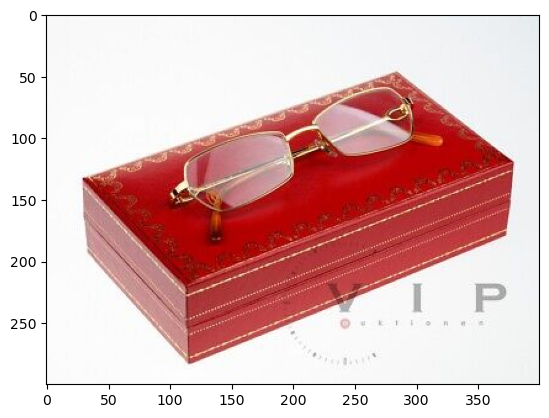

In [15]:
import cv2
import matplotlib.pyplot as plt

ImageOption = int(input("choose an option: "))

imagePath = 'item_image.jpg'
image = cv2.imread(imagePath)
if ImageOption == 1:
    plt.imshow(image)
    plt.show()
elif ImageOption == 2:
    imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(imageRGB)
    plt.show()
elif ImageOption == 3:
    ImageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    plt.imshow(ImageGray, cmap='gray')
    plt.show()
elif ImageOption == 4:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    brightness_lvl = int(input("choose the brightness level: "))
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            for k in range(image.shape[2]):
                image[i][j][k] = min(255, max(0, image[i][j][k] + brightness_lvl))
    plt.imshow(image)
    plt.show()
elif ImageOption == 5:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            for k in range(image.shape[2]):
                image[i][j][k] = min(255, max(0, 255 - image[i][j][k]))
    plt.imshow(image)
    plt.show()
elif ImageOption == 6:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 100, 200)
    plt.imshow(edges, cmap='gray')
    plt.show()

More Graphs

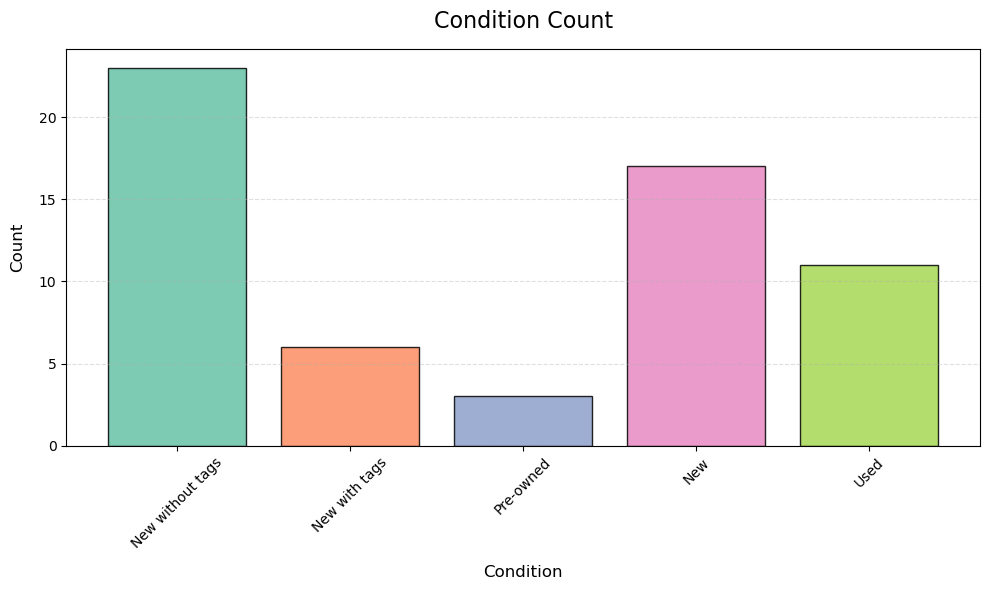

In [16]:
def show_condition_graph():
    cond_name = [list(condition.keys())[0], 
                 list(condition.keys())[1], 
                 list(condition.keys())[2], 
                 list(condition.keys())[3], 
                 list(condition.keys())[4]]
    cond_value = [condition[cond_name[0]], 
                  condition[cond_name[1]], 
                  condition[cond_name[2]], 
                  condition[cond_name[3]], 
                  condition[cond_name[4]]]

    plt.figure(figsize=(10, 6))
    bars = plt.bar(cond_name, cond_value, alpha=0.85, color=plt.cm.Set2.colors, edgecolor='black')

    plt.xlabel('Condition', fontsize=12, labelpad=10)
    plt.ylabel('Count', fontsize=12, labelpad=10)
    plt.title('Condition Count', fontsize=16, pad=15)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.4)

    plt.tight_layout()

    if os.path.exists('condition_graph.jpg'):
        os.remove('condition_graph.jpg')
    plt.savefig('condition_graph.jpg', dpi=300, bbox_inches='tight')
    plt.show()

show_condition_graph()


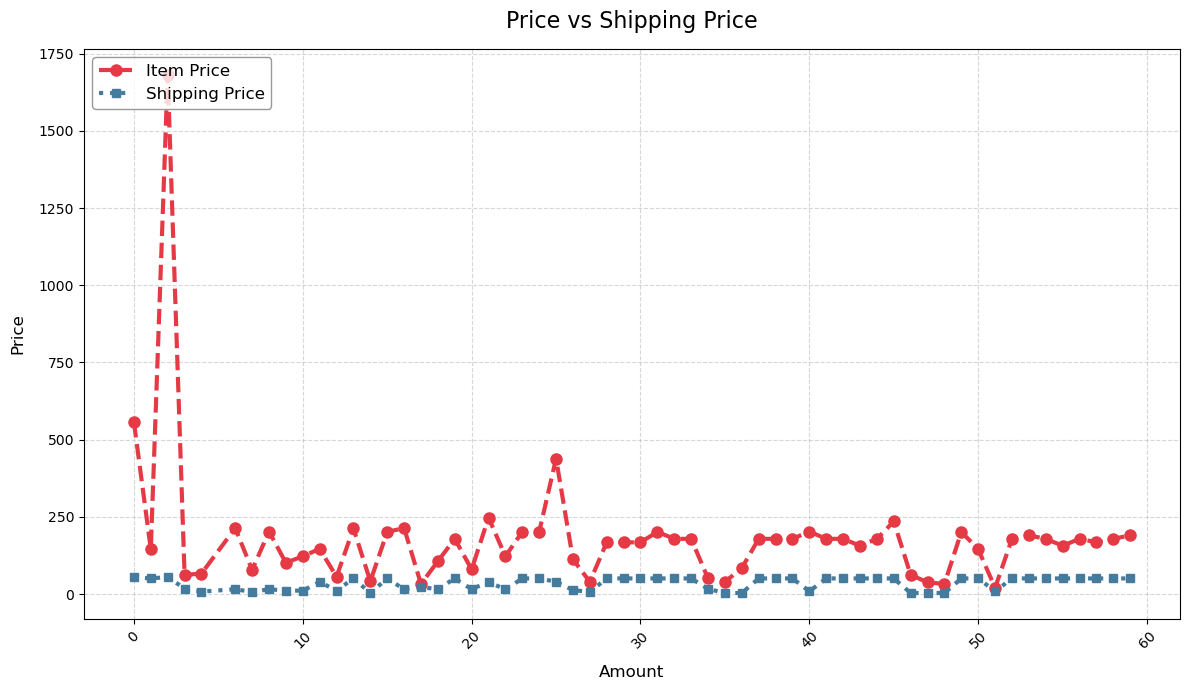

In [17]:
import numpy as np

def show_price_graph(x, y):
    amount = []
    nor_value = []
    ship_value = []
    if y == 0:
        y = len(price) if len(price) < len(ship_price) else len(ship_price)
    for i in range(x, y):
        try:
            nor_value.append(float(price[i].get_text(strip=True).replace('$', '').replace(',', '')))
            ship_value.append(float(ship_price[i].get_text(strip=True).replace('$', '').replace(',', '').replace(' shipping', '')))
            amount.append(i)
        except:
            pass

    plt.figure(figsize=(12, 7))

    plt.plot(amount, nor_value, color="#E63946", linestyle="--", linewidth=3, marker="o", markersize=8, label="Item Price")
    plt.plot(amount, ship_value, color="#457B9D", linestyle=':', marker="s", markersize=6, linewidth=3, label="Shipping Price")

    plt.title("Price vs Shipping Price", fontsize=16, pad=15)
    plt.xlabel("Amount", fontsize=12, labelpad=10)
    plt.ylabel("Price", fontsize=12, labelpad=10)

    plt.legend(fontsize=12, loc='upper left', frameon=True, edgecolor='gray')
    plt.grid(axis='both', linestyle='--', alpha=0.5)

    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)

    plt.tight_layout()

    if os.path.exists('price_compare.jpg'):
        os.remove('price_compare.jpg')
    plt.savefig('price_compare.jpg', dpi=300, bbox_inches='tight')
    plt.show()

a = int(input("choose the amount of items you want to see: "))
b = int(input("choose the amount of items you want to see: "))
show_price_graph(a, b)


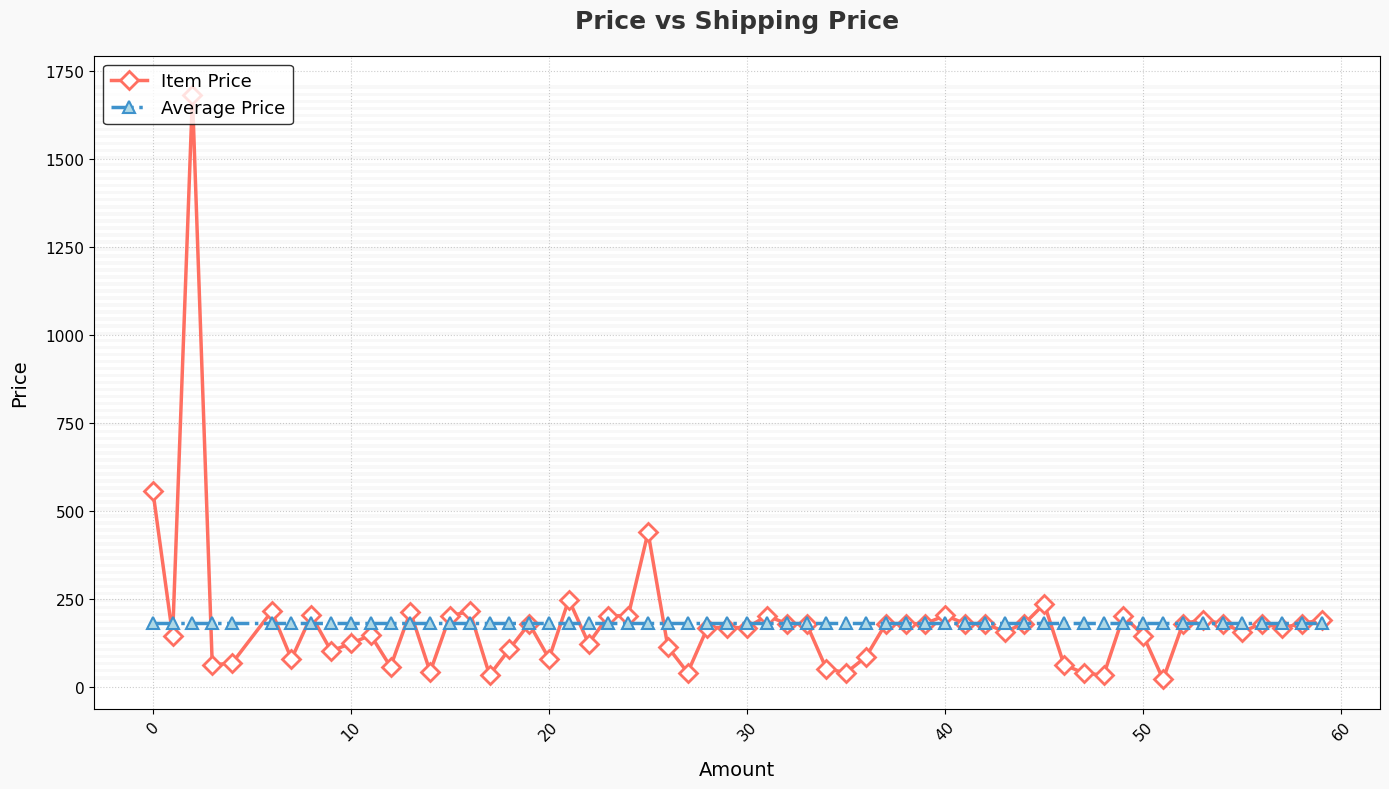

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import os

def show_price_graph2(x, y):
    amount = []
    nor_price = []
    avr_price = []
    for i in range(x, y):
        try:
            nor_price.append(float(price[i].get_text(strip=True).replace('$', '').replace(',', '')))
            amount.append(i)
        except:
            pass

    if y <= 60 and x == 0:
        y = len(price) if len(price) < len(ship_price) else len(ship_price)
        y -= 1
    avr = sum(nor_price) / len(nor_price)
    for i in range(x, y):
        avr_price.append(avr)

    plt.figure(figsize=(14, 8), facecolor='#f9f9f9')

    plt.plot(amount, nor_price, color="#FF6F61", linestyle="-", linewidth=2.5,
             marker="D", markersize=9, markerfacecolor='white', markeredgewidth=2,
             label="Item Price")
    plt.plot(amount, avr_price, color="#3E92CC", linestyle='-.', linewidth=2.5,
             marker="^", markersize=8, markerfacecolor='lightblue', markeredgewidth=1.5,
             label="Average Price")

    for i in range(int(min(nor_price)), int(max(nor_price))+20, 20):
        plt.axhspan(i, i+10, facecolor='gray', alpha=0.05)

    plt.title("Price vs Shipping Price", fontsize=18, fontweight='bold', color='#333', pad=20)
    plt.xlabel("Amount", fontsize=14, labelpad=12)
    plt.ylabel("Price", fontsize=14, labelpad=12)

    plt.legend(fontsize=13, loc='upper left', frameon=True, facecolor='white', edgecolor='black')

    plt.grid(axis='both', linestyle=':', alpha=0.4, color='gray')

    plt.xticks(rotation=45, fontsize=11)
    plt.yticks(fontsize=11)

    plt.tight_layout()

    if os.path.exists('price_avr_compare.jpg'):
        os.remove('price_avr_compare.jpg')
    plt.savefig('price_avr_compare.jpg', dpi=300, bbox_inches='tight')
    plt.show()

a = int(input("choose the amount of items you want to see: "))
b = int(input("choose the amount of items you want to see: "))
show_price_graph2(a, b)


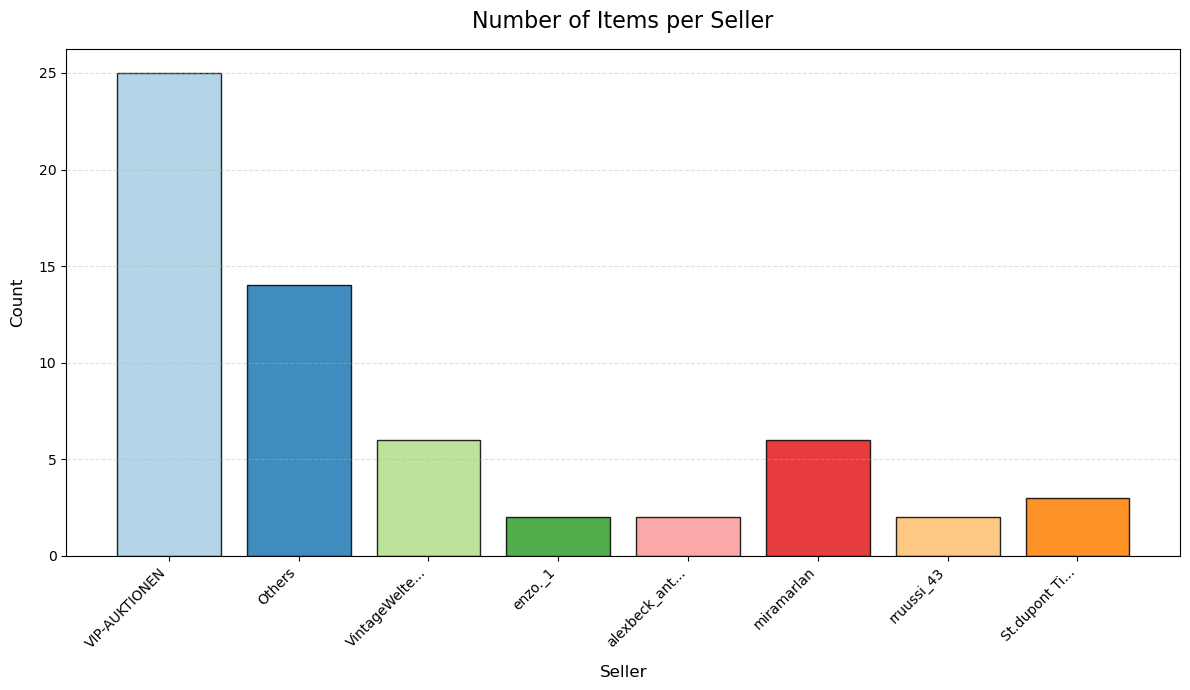

In [19]:
def show_seller_bargraph():
    seller_name = []
    seller_value = []
    for i in range(len(Sellers)):
        name = list(Sellers.keys())[i]
        if len(name) > 15:
            name = name[:12] + '...'
        seller_name.append(name)
        seller_value.append(Sellers[list(Sellers.keys())[i]])

    plt.figure(figsize=(12, 7))
    bars = plt.bar(seller_name, seller_value, alpha=0.85, color=plt.cm.Paired.colors, edgecolor='black')

    plt.xlabel('Seller', fontsize=12, labelpad=10)
    plt.ylabel('Count', fontsize=12, labelpad=10)
    plt.title('Number of Items per Seller', fontsize=16, pad=15)

    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)

    plt.grid(axis='y', linestyle='--', alpha=0.4)

    plt.tight_layout()

    if os.path.exists('amountseller_graph.jpg'):
        os.remove('amountseller_graph.jpg')
    plt.savefig('amountseller_graph.jpg', dpi=300, bbox_inches='tight')
    plt.show()

show_seller_bargraph()


GUI code

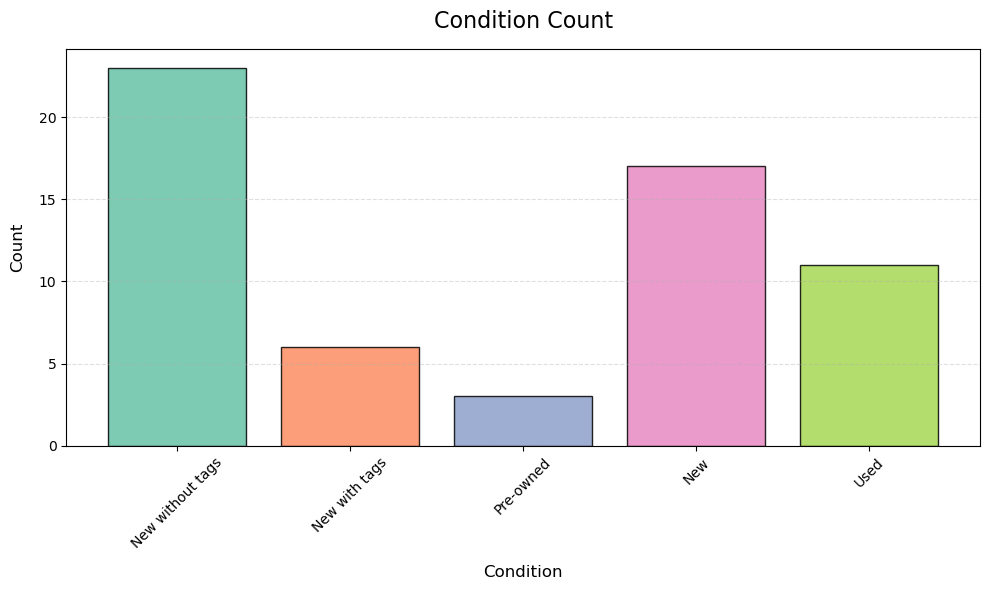

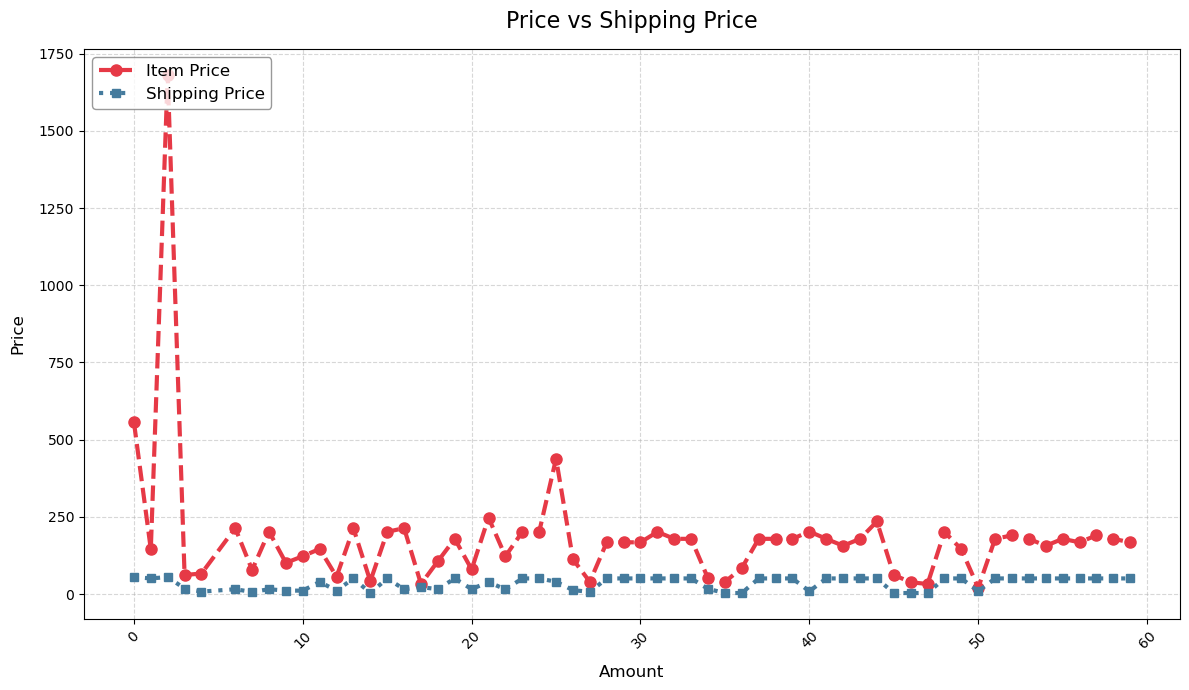

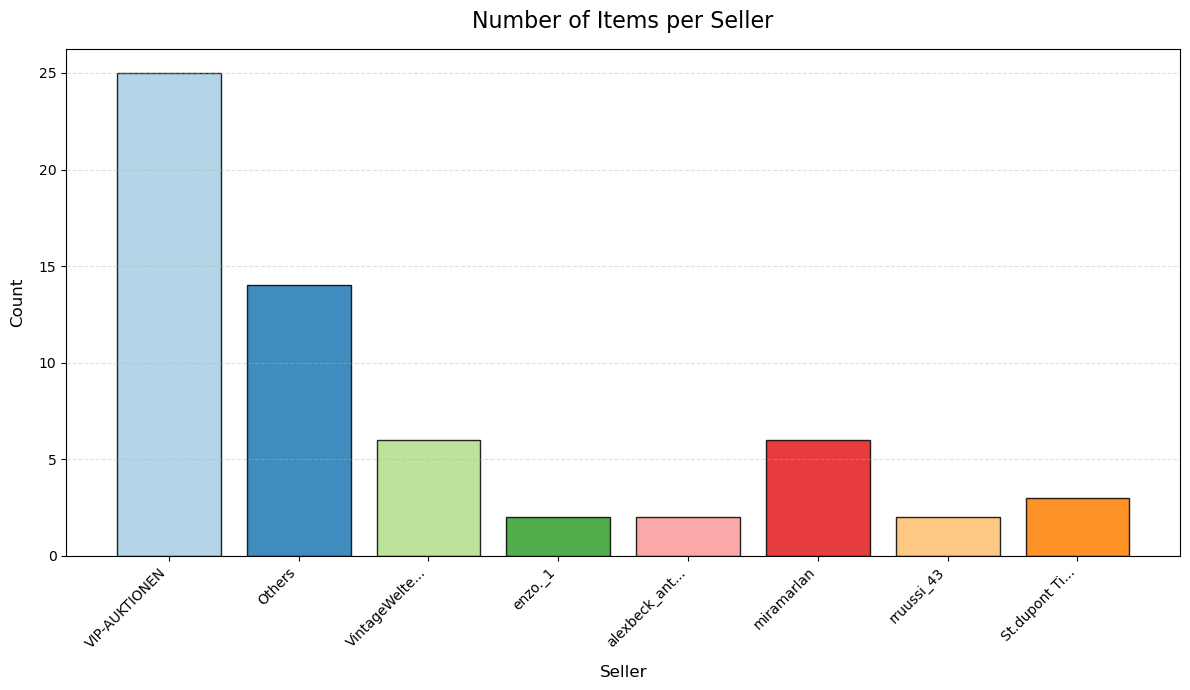

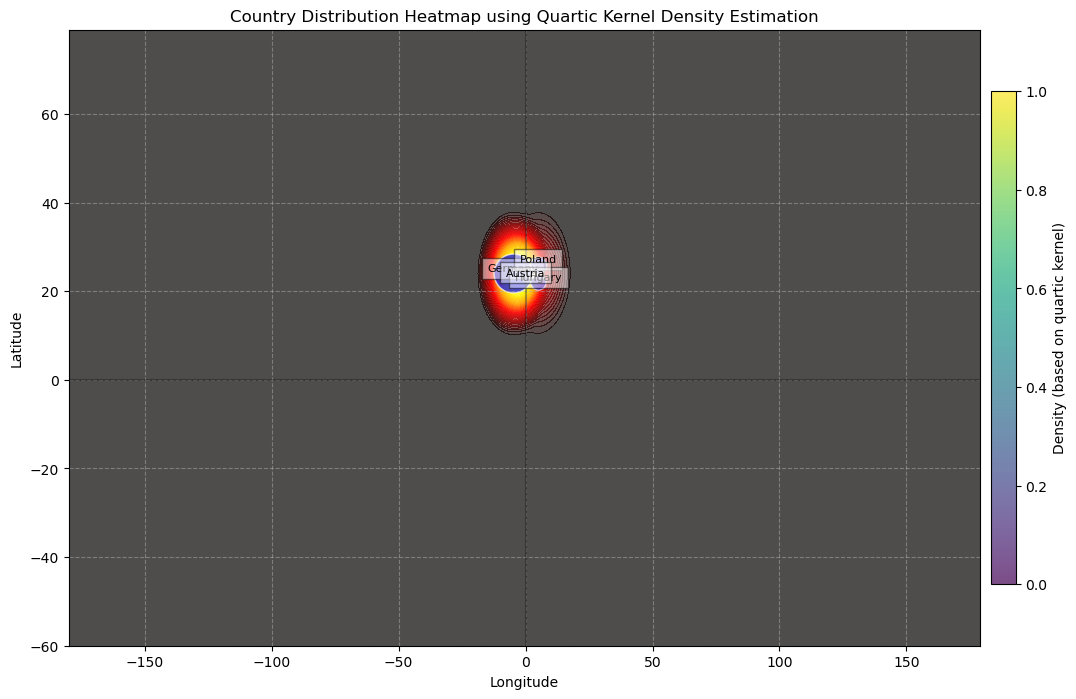

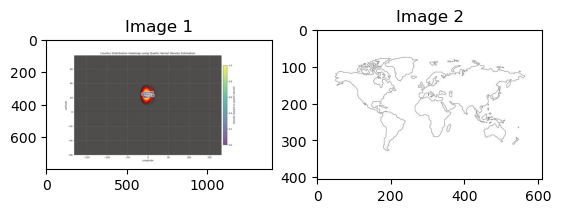

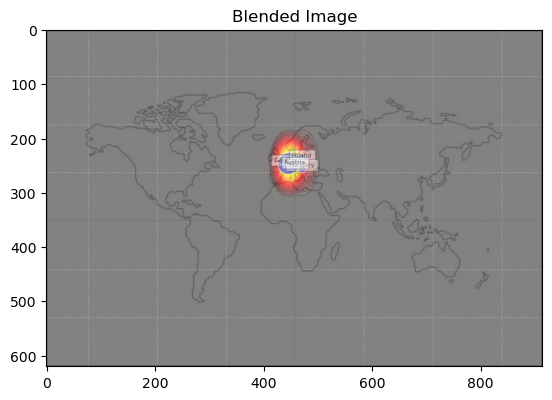

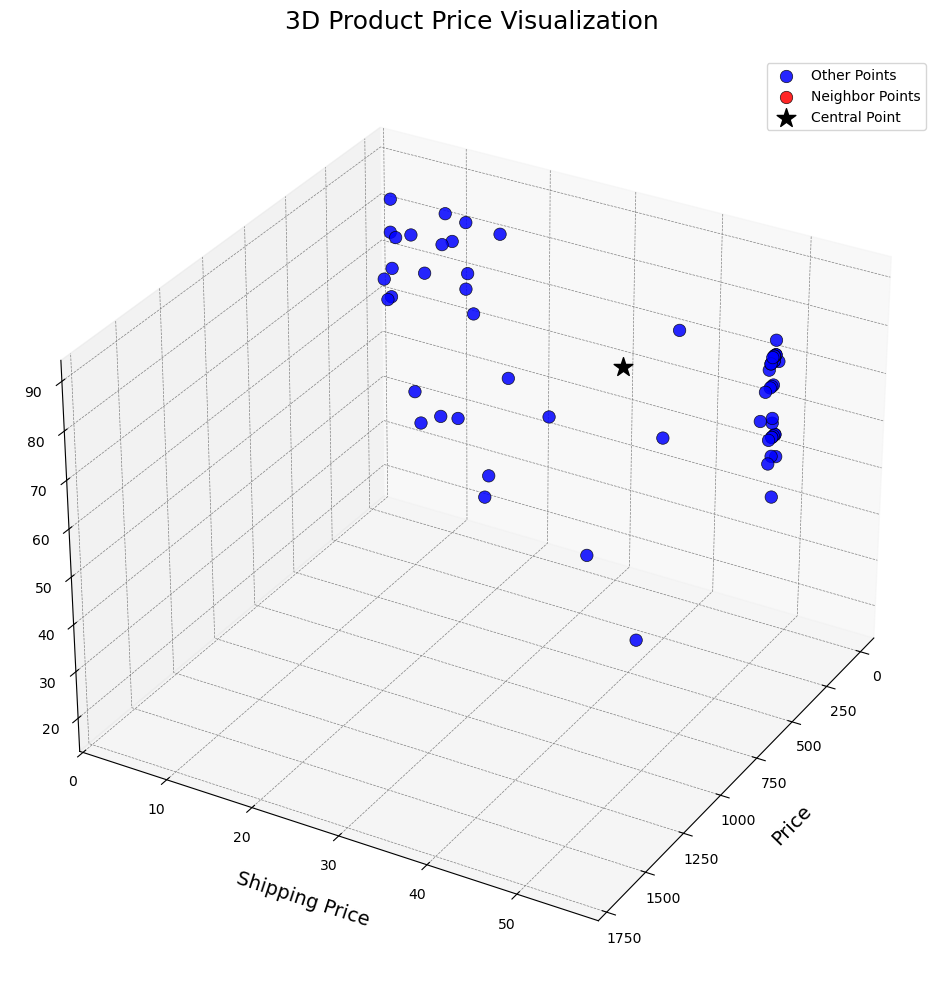

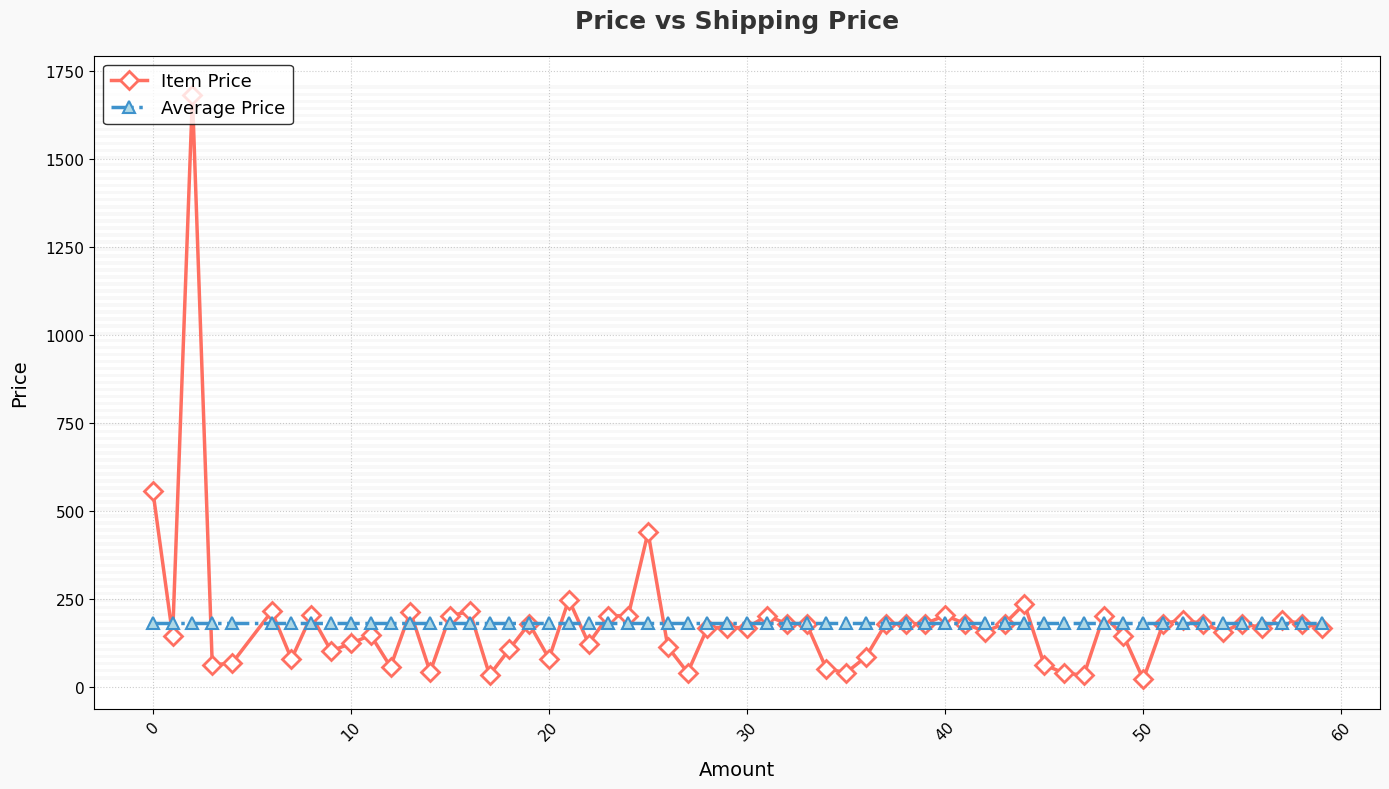

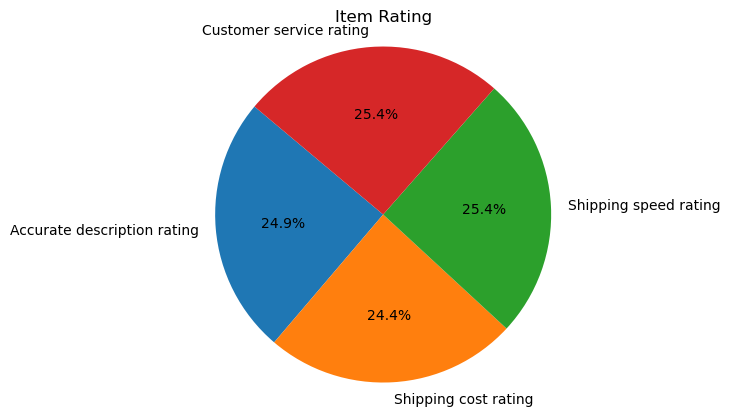

Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\omara\anaconda3\Lib\tkinter\__init__.py", line 1968, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\omara\AppData\Local\Temp\ipykernel_13348\2343816312.py", line 332, in on_inspect_close
    insp_win.config(state=NORMAL)
    ^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 'config'


In [33]:
import webbrowser
import PIL.ImageTk
import requests as rq
import os
import PIL
import cv2

#region ebay_win_functions
def update_scroll_item(c):
    global text_scroll, max_amount
    max_amount = len(list_of_items)
    text_scroll = str(c) + ' / ' + str(max_amount)
    return text_scroll

def item_next():
    global c1, text_scroll, Item_scroll, item_name, item_price
    if c1 < len(list_of_items) - 1:
        c1 += 1
        text_scroll = update_scroll_item(c1)
        Item_scroll.config(text=text_scroll)
        item_name.config(text=str(list_of_items[c1][2]))
        item_price.config(text=str(list_of_items[c1][1]))

def item_prev():
    global c1, text_scroll, Item_scroll, item_name, item_price
    if c1 > 0:
        c1 -= 1
        text_scroll = update_scroll_item(c1)
        Item_scroll.config(text=text_scroll)
        item_name.config(text=str(list_of_items[c1][2]))
        item_price.config(text=str(list_of_items[c1][1]))

def UpdateItems():
    item_name.config(text=str(list_of_items[c1][2]))
    item_price.config(text=str(list_of_items[c1][1]))
    Item_scroll.config(text=str(c1) + ' / ' + str(len(list_of_items)))

def Combo_Function1():
    Search_ebay(search_bar.get())
    UpdateItems()
#endregion

#region inspection_win_functions
def image_getter(c):
    if os.path.exists('item_image.jpg'):
        os.remove('item_image.jpg')
        img_url = list_of_items[c][4]
        response = requests.get(img_url)
        with open('item_image.jpg', 'wb') as handler:
            handler.write(response.content)
    else:
        img_url = list_of_items[c][4]
        response = requests.get(img_url)
        with open('item_image.jpg', 'wb') as handler:
            handler.write(response.content)

def show_Item_graph_win():
    show_Item_graph()
    img = PIL.Image.open('item_Graph.jpg')
    img = img.resize((600, 400))
    photo = PIL.ImageTk.PhotoImage(img)

    graphwin1 = Toplevel()
    graphwin1.geometry("700x500")
    graphwin1.title("Item Graph")
    graphwin1.config(bg="#2C3E50")

    title_label = Label(graphwin1,
                        text="Item Rating Graph",
                        bg="#2C3E50",
                        fg="white",
                        font=('Verdana', 18, 'bold'))
    title_label.place(relx=0.5, y=20, anchor='center')

    label4 = Label(graphwin1, image=photo, bg="#2C3E50")
    label4.image = photo
    label4.place(relx=0.5, rely=0.55, anchor='center')

def show_seller_graph_win():
    Show_seller_graph()
    img = PIL.Image.open('Seller_Graph.jpg') 
    img = img.resize((600, 400))
    photo = PIL.ImageTk.PhotoImage(img)

    graphwin2 = Toplevel()
    graphwin2.geometry("700x500")
    graphwin2.title("Seller Graph")
    graphwin2.config(bg="#2C3E50")

    title_label = Label(graphwin2,
                        text="Seller Rating Graph",
                        bg="#2C3E50",
                        fg="white",
                        font=('Verdana', 18, 'bold'))
    title_label.place(relx=0.5, y=20, anchor='center')

    label5 = Label(graphwin2, image=photo, bg="#2C3E50")
    label5.image = photo
    label5.place(relx=0.5, rely=0.55, anchor='center')
#endregion

#region Photo_edit_win_functions
def combo_function2():
    image_getter(c1)
    set_image()

def set_image():
    img = PIL.Image.open('item_image.jpg')
    img = img.resize((300, 300))
    photo = PIL.ImageTk.PhotoImage(img)
    img_label.config(image=photo)
    img_label.image = photo

def image_gray():
    img = cv2.imread('item_image.jpg')
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_bgr = cv2.cvtColor(gray_img, cv2.COLOR_GRAY2BGR)
    cv2.imwrite('item_image.jpg', gray_bgr)
    set_image()

def image_brightness():
    img = cv2.imread('item_image.jpg')
    brightness_lvl = Brightness_Scroll.get()
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for k in range(img.shape[2]):
                img[i][j][k] = min(255, max(0, img[i][j][k] + brightness_lvl))
    cv2.imwrite('item_image.jpg', img)
    set_image()

def image_negative():
    img = cv2.imread('item_image.jpg')
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for k in range(img.shape[2]):
                img[i][j][k] = min(255, max(0, 255 - img[i][j][k]))
    cv2.imwrite('item_image.jpg', img)
    set_image()

def image_edge():
    img = cv2.imread('item_image.jpg')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 100, 200)
    cv2.imwrite('item_image.jpg', edges)
    set_image()

#endregion

#region Photo_edit_win
def photo_edit_win():
    global img_label, Brightness_Scroll
    img = PIL.Image.open('item_image.jpg') 
    img = img.resize((300, 300))
    photo = PIL.ImageTk.PhotoImage(img)

    image_win = Toplevel()
    image_win.geometry("960x540")
    image_win.title("Photo Editing")
    image_win.config(bg="#2C3E50")

    title_label = Label(image_win,
                        text="Photo Editing",
                        bg="#2C3E50",
                        fg="white",
                        font=('Verdana', 20, 'bold'))
    title_label.place(relx=0.5, y=20, anchor='center')

    img_label = Label(image_win, image=photo, bg="#2C3E50")
    img_label.image = photo
    img_label.place(x=330, y=70)

    def create_button(text, command, x, y):
        btn = Button(image_win,
                     text=text,
                     command=command,
                     bg='#2980B9',
                     fg='white',
                     font=('Verdana', 12, 'bold'),
                     relief='raised', bd=4)
        btn.place(x=x, y=y)
        btn.bind("<Enter>", lambda e: btn.config(bg='#F39C12'))
        btn.bind("<Leave>", lambda e: btn.config(bg='#2980B9'))
        return btn

    Original_button = create_button("Original", combo_function2, 20, 270)
    Gray_button = create_button("Black & White", image_gray, 20, 320)
    Brightness_button = create_button("Change Brightness", image_brightness, 20, 370)
    Negative_button = create_button("Negative", image_negative, 20, 420)
    Edge_button = create_button("Edge Detection", image_edge, 20, 470)

    Brightness_Scroll = Scale(image_win,
                              from_=-200,
                              to=200,
                              orient=HORIZONTAL,
                              bg='#34495E',
                              fg='white',
                              length=350,
                              font=('Verdana', 10, 'bold'),
                              relief='flat',
                              highlightthickness=0)
    Brightness_Scroll.place(x=300, y=360)
#endregion

#region Inspection_win
def inspectionWin():
    global c1, insp_win, Graph1_button, Graph2_button
    #item_rate(c1)  # <--------------------------- Remove to Activate (read report for understanding)
    #seller_rate(c1)    # <--------------------------- Remove to Activate (read report for understanding)
    image_getter(c1)
    img = PIL.Image.open('item_image.jpg')
    img = img.resize((300, 300))
    photo = PIL.ImageTk.PhotoImage(img)

    try:
        item_rate = (f'Five star rating: {five_rate_count}\n'
                     f'Four star rating: {four_rate_count}\n'
                     f'Three star rating: {three_rate_count}\n'
                     f'Two star rating: {two_rate_count}\n'
                     f'One star rating: {one_rate_count}')
        item_rate_found = True
    except:
        item_rate = ('Five star rating: not available\n'
                     'Four star rating: not available\n'
                     'Three star rating: not available\n'
                     'Two star rating: not available\n'
                     'One star rating: not available')
        item_rate_found = False

    try:
        seller_rate = (f'Accurate description: {acc_rate}\n'
                       f'Shipping cost: {ship_cost}\n'
                       f'Shipping speed: {ship_speed}\n'
                       f'Customer service: {comm}')
        Seller_rate_found = True
    except:
        seller_rate = ('Accurate description: not available\n'
                       'Shipping cost: not available\n'
                       'Shipping speed: not available\n'
                       'Customer service: not available')
        Seller_rate_found = False

    insp_win = Toplevel()
    insp_win.geometry("960x540")
    insp_win.title("Ebay Inspection")
    insp_win.config(bg="#2C3E50")
    insp_win.protocol("WM_DELETE_WINDOW", on_inspect_close)

    title_label = Label(insp_win,
                        text="Item Inspection",
                        bg="#2C3E50",
                        fg="white",
                        font=('Verdana', 20, 'bold'))
    title_label.place(relx=0.5, y=20, anchor='center')

    label = Label(insp_win, image=photo, bg="#2C3E50")
    label.image = photo
    label.place(x=30, y=70)

    label2 = Label(insp_win,
                   text=list_of_items[c1][2],
                   bg='#34495E',
                   fg='white',
                   font=('Verdana', 12, 'bold'),
                   wraplength=250,
                   justify='left')
    label2.place(x=30, y=380)

    label3 = Label(insp_win,
                   text=list_of_items[c1][1],
                   bg='#34495E',
                   fg='white',
                   font=('Verdana', 12),
                   wraplength=250,
                   justify='left')
    label3.place(x=30, y=480)

    label4 = Label(insp_win,
                   text=item_rate,
                   bg='#34495E',
                   fg='white',
                   font=('Verdana', 10),
                   justify='left')
    label4.place(x=400, y=70)

    label5 = Label(insp_win,
                   text=seller_rate,
                   bg='#34495E',
                   fg='white',
                   font=('Verdana', 10),
                   justify='left')
    label5.place(x=400, y=200)

    Graph1_button = Button(insp_win,
                           state=NORMAL if item_rate_found else DISABLED,
                           text="Show Item Graph",
                           command=show_Item_graph_win,
                           bg='#2980B9',
                           fg='white',
                           font=('Verdana', 12, 'bold'),
                           relief='raised', bd=4)
    Graph1_button.place(x=400, y=350)
    Graph1_button.bind("<Enter>", lambda e: Graph1_button.config(bg='#F39C12'))
    Graph1_button.bind("<Leave>", lambda e: Graph1_button.config(bg='#2980B9'))

    Graph2_button = Button(insp_win,
                           state=NORMAL if Seller_rate_found else DISABLED,
                           text="Show Seller Graph",
                           command=show_seller_graph_win,
                           bg='#2980B9',
                           fg='white',
                           font=('Verdana', 12, 'bold'),
                           relief='raised', bd=4)
    Graph2_button.place(x=400, y=400)
    Graph2_button.bind("<Enter>", lambda e: Graph2_button.config(bg='#F39C12'))
    Graph2_button.bind("<Leave>", lambda e: Graph2_button.config(bg='#2980B9'))

    Photo_edit_button = Button(insp_win,
                               text="Edit Photo",
                               command=photo_edit_win,
                               bg='#2980B9',
                               fg='white',
                               font=('Verdana', 12, 'bold'),
                               relief='raised', bd=4)
    Photo_edit_button.place(x=400, y=450)
    Photo_edit_button.bind("<Enter>", lambda e: Photo_edit_button.config(bg='#F39C12'))
    Photo_edit_button.bind("<Leave>", lambda e: Photo_edit_button.config(bg='#2980B9'))

def on_inspect_close():
    global insp_win
    insp_win.destroy()
    insp_win = None
    insp_win.config(state=NORMAL)
#endregion

#region Networkx_win
def netx_function():
    networkx_graph(int(Low_numx.get()), int(Max_numx.get()), int(Diff_numx.get()))
    img = PIL.Image.open('NetX_Graph.jpg')
    img = img.resize((350, 350))
    photo = PIL.ImageTk.PhotoImage(img)
    nex_label.config(image=photo)
    nex_label.image = photo

def netx_win():
    global netx_win, Low_numx, Max_numx, Diff_numx, nex_label
    img = PIL.Image.open('NetX_Graph.jpg')
    img = img.resize((350, 350))
    photo = PIL.ImageTk.PhotoImage(img)

    netx_win = Toplevel()
    netx_win.geometry("960x540")
    netx_win.title("NetworkX")
    netx_win.config(bg="#2C3E50") 

    title_label = Label(netx_win,
                        text="NetworkX Graph",
                        bg="#2C3E50",
                        fg="white",
                        font=('Verdana', 20, 'bold'))
    title_label.place(relx=0.5, y=30, anchor='center')

    nex_label = Label(netx_win, image=photo, bg="#2C3E50")
    nex_label.image = photo
    nex_label.place(x=300, y=70)

    Low_lbl = Label(netx_win,
                    text='Low Num Set',
                    bg='#2C3E50',
                    fg='white',
                    font=('Verdana', 12, 'bold'))
    Low_lbl.place(x=50, y=430)

    high_lbl = Label(netx_win,
                     text='High Num Set',
                     bg='#2C3E50',
                     fg='white',
                     font=('Verdana', 12, 'bold'))
    high_lbl.place(x=50, y=470)

    diff_lbl = Label(netx_win,
                     text='Diff Num Set',
                     bg='#2C3E50',
                     fg='white',
                     font=('Verdana', 12, 'bold'))
    diff_lbl.place(x=50, y=510)

    warning_label = Label(netx_win,
                          text="⚠ Warning: Make sure Low Num doesn't exceed High Num",
                          bg='#2C3E50',
                          fg='red',
                          font=('Verdana', 10, 'bold'))
    warning_label.place(x=400, y=500)

    Low_numx = Scale(netx_win,
                     from_=0,
                     to=max_amount,
                     orient=HORIZONTAL,
                     bg='#34495E',
                     fg='white',
                     troughcolor='#2980B9',
                     length=300)
    Low_numx.place(x=200, y=420)

    Max_numx = Scale(netx_win,
                     from_=0,
                     to=max_amount,
                     orient=HORIZONTAL,
                     bg='#34495E',
                     fg='white',
                     troughcolor='#2980B9',
                     length=300)
    Max_numx.place(x=200, y=460)

    Diff_numx = Entry(netx_win,
                      bg='#ECF0F1',
                      font=('Verdana', 12),
                      relief='groove', bd=3)
    Diff_numx.place(x=200, y=500, width=200)

    submit_nex = Button(netx_win,
                        text="Submit",
                        bg='#2980B9',
                        fg='white',
                        font=('Verdana', 12, 'bold'),
                        relief='raised', bd=4,
                        padx=10, pady=5,
                        command=netx_function)
    submit_nex.place(x=700, y=440)
    submit_nex.bind("<Enter>", lambda e: submit_nex.config(bg='#F39C12'))
    submit_nex.bind("<Leave>", lambda e: submit_nex.config(bg='#2980B9'))
#endregion

#region Graph_wins
def condition_graph_win():
    #get_condition()   # <--------------------------- Remove to Activate (read report for understanding)
    show_condition_graph()
    img = PIL.Image.open('condition_graph.jpg')
    img = img.resize((500, 450))
    photo = PIL.ImageTk.PhotoImage(img)

    conGraph_win = Toplevel()
    conGraph_win.geometry("540x540")
    conGraph_win.title("Condition Graph")
    conGraph_win.config(bg="#2C3E50") 

    title_label = Label(conGraph_win,
                        text="Condition Graph",
                        bg="#2C3E50",
                        fg="white",
                        font=('Verdana', 20, 'bold'))
    title_label.pack(pady=10)

    conGraph_label = Label(conGraph_win,
                           image=photo,
                           bg="#2C3E50")
    conGraph_label.image = photo
    conGraph_label.place(x=20, y=60)

    frame = Frame(conGraph_win, bg='white', bd=2, relief='solid')
    frame.place(x=18, y=58, width=504, height=454)
    conGraph_label.lift()

def edit_prComp_graph():
    show_price_graph(int(prComp_entry.get()), int(prComp_entry2.get()))
    img = PIL.Image.open('price_compare.jpg')
    img = img.resize((500, 450))
    photo = PIL.ImageTk.PhotoImage(img)
    prComp_label.config(image=photo)
    prComp_label.image = photo

def price_graph_win():
    global prComp_entry, prComp_label, prComp_entry2
    show_price_graph(0, 60)
    img = PIL.Image.open('price_compare.jpg')
    img = img.resize((500, 450))
    photo = PIL.ImageTk.PhotoImage(img)

    prComp_win = Toplevel()
    prComp_win.geometry("960x540")
    prComp_win.title("Price Compare")
    prComp_win.config(bg="#34495E")

    title_label = Label(prComp_win,
                        text="Price Compare Graph",
                        bg="#34495E",
                        fg="white",
                        font=('Verdana', 20, 'bold'))
    title_label.pack(pady=10)

    prComp_label = Label(prComp_win, image=photo, bg="#34495E")
    prComp_label.image = photo
    prComp_label.place(x=20, y=60)

    prComp_label2 = Label(prComp_win,
                          text="First Number of Items:",
                          bg='#2C3E50',
                          fg='white',
                          font=('Verdana', 12, 'bold'),
                          padx=10, pady=5)
    prComp_label2.place(x=600, y=90)

    prComp_entry = Entry(prComp_win,
                         bg='#ECF0F1',
                         font=('Verdana', 12),
                         relief='groove', bd=3)
    prComp_entry.place(x=600, y=130, width=200)

    prComp_label3 = Label(prComp_win,
                          text="Last Number of Items:",
                          bg='#2C3E50',
                          fg='white',
                          font=('Verdana', 12, 'bold'),
                          padx=10, pady=5)
    prComp_label3.place(x=600, y=180)

    prComp_entry2 = Entry(prComp_win,
                          bg='#ECF0F1',
                          font=('Verdana', 12),
                          relief='groove', bd=3)
    prComp_entry2.place(x=600, y=220, width=200)

    prComp_button = Button(prComp_win,
                           text="Submit",
                           bg='#2980B9',
                           fg='white',
                           font=('Verdana', 12, 'bold'),
                           relief='raised', bd=4,
                           padx=10, pady=5,
                           command=edit_prComp_graph)
    prComp_button.place(x=700, y=280)
    prComp_button.bind("<Enter>", lambda e: prComp_button.config(bg='#F39C12'))
    prComp_button.bind("<Leave>", lambda e: prComp_button.config(bg='#2980B9'))

def edit_prComp_graph2():
    show_price_graph2(int(prComp_entry3.get()), int(prComp_entry4.get()))
    img = PIL.Image.open('price_avr_compare.jpg')
    img = img.resize((500, 450)) 
    photo = PIL.ImageTk.PhotoImage(img)
    prComp_labelw.config(image=photo)
    prComp_labelw.image = photo

def price_graph_win2():
    global prComp_entry3, prComp_labelw, prComp_entry4
    show_price_graph2(0, 60)
    img = PIL.Image.open('price_avr_compare.jpg')
    img = img.resize((500, 450))
    photo = PIL.ImageTk.PhotoImage(img)

    prComp_win2 = Toplevel()
    prComp_win2.geometry("960x540")
    prComp_win2.title("Price Average Compare")
    prComp_win2.config(bg="#34495E")

    title_label = Label(prComp_win2,
                        text="Price/Average Compare Graph",
                        bg="#34495E",
                        fg="white",
                        font=('Verdana', 20, 'bold'))
    title_label.pack(pady=10)

    prComp_labelw = Label(prComp_win2, image=photo, bg="#34495E")
    prComp_labelw.image = photo
    prComp_labelw.place(x=20, y=60)

    prComp_label2 = Label(prComp_win2,
                          text="First Number of Items:",
                          bg='#2C3E50',
                          fg='white',
                          font=('Verdana', 12, 'bold'),
                          padx=10, pady=5)
    prComp_label2.place(x=600, y=90)

    prComp_entry3 = Entry(prComp_win2,
                          bg='#ECF0F1',
                          font=('Verdana', 12),
                          relief='groove', bd=3)
    prComp_entry3.place(x=600, y=130, width=200)

    prComp_label3 = Label(prComp_win2,
                          text="Last Number of Items:",
                          bg='#2C3E50',
                          fg='white',
                          font=('Verdana', 12, 'bold'),
                          padx=10, pady=5)
    prComp_label3.place(x=600, y=180)

    prComp_entry4 = Entry(prComp_win2,
                          bg='#ECF0F1',
                          font=('Verdana', 12),
                          relief='groove', bd=3)
    prComp_entry4.place(x=600, y=220, width=200)

    prComp_button2 = Button(prComp_win2,
                            text="Submit",
                            bg='#2980B9',
                            fg='white',
                            font=('Verdana', 12, 'bold'),
                            relief='raised', bd=4,
                            padx=10, pady=5,
                            command=edit_prComp_graph2)
    prComp_button2.place(x=700, y=280)
    prComp_button2.bind("<Enter>", lambda e: prComp_button2.config(bg='#F39C12'))
    prComp_button2.bind("<Leave>", lambda e: prComp_button2.config(bg='#2980B9'))

def amount_seller_Graph():
    #get_sellers()   # <--------------------------- Remove to Activate (read report for understanding)
    show_seller_bargraph()
    img = PIL.Image.open('amountseller_graph.jpg')
    img = img.resize((500, 450))
    photo = PIL.ImageTk.PhotoImage(img)

    amoSeller_win = Toplevel()
    amoSeller_win.geometry("540x540")
    amoSeller_win.title("Amount of Sellers Graph")
    amoSeller_win.config(bg="#2C3E50")

    title_label = Label(amoSeller_win,
                        text="Amount of Sellers Graph",
                        bg="#2C3E50",
                        fg="white",
                        font=('Verdana', 20, 'bold'))
    title_label.pack(pady=10)

    amoSeller_label = Label(amoSeller_win,
                            image=photo,
                            bg="#2C3E50")
    amoSeller_label.image = photo
    amoSeller_label.place(x=20, y=60) 

    frame = Frame(amoSeller_win, bg='white', bd=2, relief='solid')
    frame.place(x=18, y=58, width=504, height=454)
    amoSeller_label.lift()

def HeatOnMap_graph_win():
    # get_Country() # <--------------------------- Remove to Activate (read report for understanding)
    HeatOnMap()
    img = PIL.Image.open('HeatOnMap.jpg')
    img = img.resize((500, 450))
    photo = PIL.ImageTk.PhotoImage(img)

    HeatOnMap_win = Toplevel()
    HeatOnMap_win.geometry("540x540")
    HeatOnMap_win.title("HeatMap Graph")
    HeatOnMap_win.config(bg="#2C3E50") 

    title_label = Label(HeatOnMap_win,
                        text="HeatMap Graph",
                        bg="#2C3E50",
                        fg="white",
                        font=('Verdana', 20, 'bold'))
    title_label.place(relx=0.5, y=30, anchor='center')

    HeatOnMap_label = Label(HeatOnMap_win, image=photo, bg="#2C3E50")
    HeatOnMap_label.image = photo
    HeatOnMap_label.place(x=20, y=70)

def ThrD_functions():
    if neighbor_entry.get() == '':
        Show_3d_Graph(x_axis_scroll.get(), y_axis_scroll.get(), z_axis_scroll.get(), 0)
    else:
        Show_3d_Graph(x_axis_scroll.get(), y_axis_scroll.get(), z_axis_scroll.get(), int(neighbor_entry.get()))
    img = PIL.Image.open('3D_Graph.jpg')
    img = img.resize((500, 450))
    photo = PIL.ImageTk.PhotoImage(img)
    ThrD_label.config(image=photo)
    ThrD_label.image = photo

def ThrD_win():
    global ThrD_label, x_axis_scroll, y_axis_scroll, z_axis_scroll, neighbor_entry
    Show_3d_Graph(30, 30, 0, 0)
    img = PIL.Image.open('3D_Graph.jpg')
    img = img.resize((500, 450))
    photo = PIL.ImageTk.PhotoImage(img)

    ThrD_win = Toplevel()
    ThrD_win.geometry("960x540")
    ThrD_win.title("3D Graph")
    ThrD_win.config(bg="#2C3E50")

    title_label = Label(ThrD_win,
                        text="3D Graph",
                        bg="#2C3E50",
                        fg="white",
                        font=('Verdana', 20, 'bold'))
    title_label.place(relx=0.5, y=30, anchor='center')

    ThrD_label = Label(ThrD_win, image=photo, bg="#2C3E50")
    ThrD_label.image = photo
    ThrD_label.place(x=20, y=70)

    submit_button = Button(ThrD_win,
                           text="Submit",
                           bg='#2980B9',
                           fg='white',
                           font=('Verdana', 12, 'bold'),
                           relief='raised', bd=4,
                           padx=10, pady=5,
                           command=ThrD_functions)
    submit_button.place(x=700, y=450)

    x_axis_label = Label(ThrD_win,
                         text="Choose the x-axis view:",
                         bg='#2C3E50',
                         fg='white',
                         font=('Verdana', 12, 'bold'))
    x_axis_label.place(x=550, y=70)

    x_axis_scroll = Scale(ThrD_win,
                          from_=0,
                          to=180,
                          orient=HORIZONTAL,
                          bg='#34495E',
                          fg='white',
                          troughcolor='#2980B9',
                          length=350)
    x_axis_scroll.place(x=550, y=100)

    y_axis_label = Label(ThrD_win,
                         text="Choose the y-axis view:",
                         bg='#2C3E50',
                         fg='white',
                         font=('Verdana', 12, 'bold'))
    y_axis_label.place(x=550, y=170)

    y_axis_scroll = Scale(ThrD_win,
                          from_=0,
                          to=180,
                          orient=HORIZONTAL,
                          bg='#34495E',
                          fg='white',
                          troughcolor='#2980B9',
                          length=350)
    y_axis_scroll.place(x=550, y=200)

    z_axis_label = Label(ThrD_win,
                         text="Choose the z-axis view:",
                         bg='#2C3E50',
                         fg='white',
                         font=('Verdana', 12, 'bold'))
    z_axis_label.place(x=550, y=270)

    z_axis_scroll = Scale(ThrD_win,
                          from_=0,
                          to=180,
                          orient=HORIZONTAL,
                          bg='#34495E',
                          fg='white',
                          troughcolor='#2980B9',
                          length=350)
    z_axis_scroll.place(x=550, y=300)

    neighbor_label = Label(ThrD_win,
                         text="Enter neighbor distance:",
                         bg='#2C3E50',
                         fg='white',
                         font=('Verdana', 12, 'bold'))
    neighbor_label.place(x=550, y=340)

    neighbor_entry = Entry(ThrD_win,
                         bg='#ECF0F1',
                         font=('Verdana', 12),
                         relief='groove', bd=3)
    neighbor_entry.place(x=550, y=370)
#endregion

#region ebay_win
def ebayWin():
    global c1, text_scroll, Item_scroll, item_name, item_price, search_bar
    c1 = 0
    text_scroll = update_scroll_item(c1)
    item_name_scroll = str(list_of_items[c1][2])
    item_price_scroll = str(list_of_items[c1][1]) 

    win.destroy()
    ebay_win = Tk()
    ebay_win.geometry("960x540")
    ebay_win.title("Ebay")
    ebay_win.config(bg="#34495E")

    label2 = Label(ebay_win,
                   text='Ebay Window',
                   bg='#34495E',
                   fg='white',
                   font=('Verdana', 28, 'bold'))
    label2.place(relx=0.5, y=50, anchor='center')

    item_name = Label(ebay_win,
                      text=item_name_scroll,
                      bg='#2C3E50',
                      fg='white',
                      font=('Verdana', 16, 'bold'),
                      padx=10, pady=5)
    item_name.place(x=50, y=250)

    item_price = Label(ebay_win,
                       text=item_price_scroll,
                       bg='#2C3E50',
                       fg='white',
                       font=('Verdana', 16, 'bold'),
                       padx=10, pady=5)
    item_price.place(x=310, y=300)

    Item_scroll = Label(ebay_win,
                        text=text_scroll,
                        bg='#2C3E50',
                        fg='white',
                        font=('Verdana', 15),
                        padx=10, pady=5)
    Item_scroll.place(x=450, y=200)

    search_bar = Entry(ebay_win,
                       bg='#ECF0F1',
                       fg='#2C3E50',
                       font=('Verdana', 15),
                       relief='groove',
                       bd=4)
    search_bar.place(x=350, y=150, width=250)

    def create_button(text, command, x, y, width=20):
        btn = Button(ebay_win,
                     text=text,
                     command=command,
                     bg='#2980B9',
                     fg='white',
                     activeforeground='white',
                     font=('Verdana', 12, 'bold'),
                     relief='raised',
                     bd=4,
                     padx=10,
                     pady=5,
                     width=width,
                     highlightthickness=0)
        btn.place(x=x, y=y)
        return btn
    create_button("Price/average Compare Graph", price_graph_win2, 400, 410, 25)
    create_button("3DGraph", ThrD_win, 220, 410, 12)
    create_button("HeatMap Graph", HeatOnMap_graph_win, 20, 410, 15)
    create_button("Amount of Sellers Graph", amount_seller_Graph, 620, 470, 22)
    create_button("Price Compare Graph", price_graph_win, 380, 470, 18)
    create_button("Condition Graph", condition_graph_win, 170, 470, 15)
    create_button("NetworkX", netx_win, 20, 470, 10)
    create_button("Search", lambda: Combo_Function1(), 600, 145, 10)
    create_button("Link", lambda: webbrowser.open(list_of_items[c1][3]), 450, 300, 10)
    create_button("Inspect", inspectionWin, 610, 300, 10)
    create_button(">", item_next, 550, 200, 3)
    create_button("<", item_prev, 370, 200, 3)

    ebay_win.update_idletasks()
    screen_width = ebay_win.winfo_screenwidth()
    screen_height = ebay_win.winfo_screenheight()
    x = (screen_width // 2) - (960 // 2)
    y = (screen_height // 2) - (540 // 2)
    ebay_win.geometry(f"+{x}+{y}")

    ebay_win.mainloop()
#endregion

#region Main_first_win
from tkinter import *

def on_enter(e):
    if e.widget.winfo_exists():
        ebaymarket['background'] = '#16A085'
        ebaymarket['bd'] = 3

def on_leave(e):
    if e.widget.winfo_exists():
        ebaymarket['background'] = '#1ABC9C'
        ebaymarket['bd'] = 2

win = Tk()
win.geometry("500x500")
win.title("Item Inspection")
win.config(bg="#2C3E50")

label1 = Label(win,
               text='Choose a Market:',
               bg="#2C3E50",
               fg="white",
               font=('Helvetica', 20, 'bold'))
label1.place(relx=0.5, y=70, anchor='center')

ebaymarket = Button(win,
                    text="Ebay",
                    command=ebayWin,
                    bg="#1ABC9C", 
                    fg="white",
                    activeforeground="white",
                    font=('Helvetica', 16, 'bold'),
                    relief="solid",
                    bd=2,
                    padx=20,
                    pady=10)
ebaymarket.place(relx=0.5, y=150, anchor='center')

ebaymarket.bind("<Enter>", on_enter)
ebaymarket.bind("<Leave>", on_leave)

win.update_idletasks()
screen_width = win.winfo_screenwidth()
screen_height = win.winfo_screenheight()
x = (screen_width // 2) - (500 // 2)
y = (screen_height // 2) - (500 // 2)
win.geometry(f"+{x}+{y}")

win.mainloop()
#endregion


In [ ]:
#include <iostream>
using namespace std;

void countCalls() {
    static int count = 0;  // Keeps its value between calls
    count++;
    cout << "Called " << count << " times\n";
}

int main() {
    countCalls();  // Called 1 times
    countCalls();  // Called 2 times
    countCalls();  // Called 3 times
    return 0;
}
